In [1]:
#Loading the required packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the dataset
train = pd.read_csv('train_influencers.csv')
train.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


In [3]:
#Cleaning the data
#Identifying presence of NAs
train.isnull().sum()

Choice                 0
A_follower_count       0
A_following_count      0
A_listed_count         0
A_mentions_received    0
A_retweets_received    0
A_mentions_sent        0
A_retweets_sent        0
A_posts                0
A_network_feature_1    0
A_network_feature_2    0
A_network_feature_3    0
B_follower_count       0
B_following_count      0
B_listed_count         0
B_mentions_received    0
B_retweets_received    0
B_mentions_sent        0
B_retweets_sent        0
B_posts                0
B_network_feature_1    0
B_network_feature_2    0
B_network_feature_3    0
dtype: int64

In [4]:
#Creating the required columns
def feat_eng(df):
    df.replace(0, 0.001)
    
    df['follower_diff'] = (df['A_follower_count'] - df['B_follower_count'])
    df['following_diff'] = (df['A_following_count'] - df['B_following_count'])
    df['listed_diff'] = (df['A_listed_count'] - df['B_listed_count'])
    df['ment_rec_diff'] = (df['A_mentions_received'] - df['B_mentions_received'])
    df['rt_rec_diff'] = (df['A_retweets_received'] - df['B_retweets_received'])
    df['ment_sent_diff'] = (df['A_mentions_sent'] - df['B_mentions_sent'])
    df['rt_sent_diff'] = (df['A_retweets_sent'] - df['B_retweets_sent'])
    df['posts_diff'] = (df['A_posts'] - df['B_posts'])
    
    df['follower_ratio'] = (df['A_follower_count'] / df['B_follower_count'])
    df['following_ratio'] = (df['A_following_count'] / df['B_following_count'])
    df['listed_ratio'] = (df['A_listed_count'] / df['B_listed_count'])
    df['ment_rec_ratio'] = (df['A_mentions_received'] / df['B_mentions_received'])
    df['rt_rec_ratio'] = (df['A_retweets_received'] / df['B_retweets_received'])
    df['ment_sent_ratio'] = (df['A_mentions_sent'] / df['B_mentions_sent'])
    df['rt_sent_ratio'] = (df['A_retweets_sent'] / df['B_retweets_sent'])
    df['posts_ratio'] = (df['A_posts'] - df['B_posts'])

    df['A_pop_ratio'] = df['A_mentions_sent'] / df['A_listed_count']
    df['A_foll_ratio'] = df['A_follower_count'] / df['A_following_count']
    df['A_ment_ratio'] = df['A_mentions_sent'] / df['A_mentions_received']
    df['A_rt_ratio'] = df['A_retweets_sent'] / df['A_retweets_received']
    
    df['B_pop_ratio'] = df['B_mentions_sent'] / df['B_listed_count']
    df['B_foll_ratio'] = df['B_follower_count'] / df['B_following_count']
    df['B_ment_ratio'] = df['B_mentions_sent'] / df['B_mentions_received']
    df['B_rt_ratio'] = df['B_retweets_sent'] / df['B_retweets_received']
    
    df['AB_foll_ratio'] = (df['A_foll_ratio'] - df['B_foll_ratio'])
    df['AB_ment_ratio'] = (df['A_ment_ratio'] - df['B_ment_ratio'])
    df['AB_rt_ratio'] = (df['A_rt_ratio'] - df['B_rt_ratio'])

    df['nf1_diff'] = (df['A_network_feature_1'] - df['B_network_feature_1'])
    df['nf2_diff'] = (df['A_network_feature_2'] - df['B_network_feature_2'])
    df['nf3_diff'] = (df['A_network_feature_3'] - df['B_network_feature_3'])
    
    df['nf3_ratio'] = df['A_network_feature_3'] / df['B_network_feature_3']
    df['nf2_ratio'] = df['A_network_feature_2'] / df['B_network_feature_2']
    df['nf1_ratio'] = df['A_network_feature_1'] / df['B_network_feature_1']
    
    df['follower_diffrat'] = ((df['A_follower_count'] - df['B_follower_count']) / (df['A_follower_count'] + df['B_follower_count']))
    df['following_diffrat'] = ((df['A_following_count'] - df['B_following_count']) / (df['A_following_count'] + df['B_following_count']))
    df['listed_diffrat'] = ((df['A_listed_count'] - df['B_listed_count']) / (df['A_listed_count'] + df['B_listed_count']))
    df['ment_rec_diffrat'] = ((df['A_mentions_received'] - df['B_mentions_received']) / (df['A_mentions_received'] + df['B_mentions_received']))
    df['rt_rec_diffrat'] = ((df['A_retweets_received'] - df['B_retweets_received']) / (df['A_retweets_received'] + df['B_retweets_received']))
    df['ment_sent_diffrat'] = ((df['A_mentions_sent'] - df['B_mentions_sent']) / (df['A_mentions_sent'] + df['B_mentions_sent']))
    df['rt_sent_diffrat'] = ((df['A_retweets_sent'] - df['B_retweets_sent']) / (df['A_retweets_sent'] + df['B_retweets_sent']))
    df['posts_diffrat'] = ((df['A_posts'] - df['B_posts']) / (df['A_posts'] + df['B_posts']))
    
    df['nf1_diffrat'] = ((df['A_network_feature_1'] - df['B_network_feature_1']) / (df['A_network_feature_1'] + df['B_network_feature_1']))
    df['nf2_diffrat'] = ((df['A_network_feature_2'] - df['B_network_feature_2']) / (df['A_network_feature_2'] + df['B_network_feature_2']))
    df['nf3_diffrat'] = ((df['A_network_feature_3'] - df['B_network_feature_3']) / (df['A_network_feature_3'] + df['B_network_feature_3']))
    
    df = df.replace([np.inf, -np.inf], 1)
    df = df.fillna(0)
    
    return(df)

train = feat_eng(train)
train.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,following_diffrat,listed_diffrat,ment_rec_diffrat,rt_rec_diffrat,ment_sent_diffrat,rt_sent_diffrat,posts_diffrat,nf1_diffrat,nf2_diffrat,nf3_diffrat
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,-0.979940,-0.996454,-0.927069,-0.950788,-0.975796,-0.535702,-0.901469,-0.941176,0.375861,0.711135
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,0.163296,-0.751904,0.381527,0.485140,0.277683,0.326360,0.657330,0.387218,-0.754868,-0.375691
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,0.431939,-0.342020,0.943998,0.928486,0.797743,0.709406,0.712276,0.938776,0.739259,0.911638
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,-0.999207,-0.985714,-0.973506,-0.998580,-0.907802,-0.972344,-0.837938,-0.993213,-0.842948,-0.871091
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,-0.329965,0.871722,0.746540,0.823479,0.609503,0.497116,0.678922,0.732704,0.448564,0.174050


In [5]:
#Normalize and center the variables
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

train = normalize(train)
train.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,following_diffrat,listed_diffrat,ment_rec_diffrat,rt_rec_diffrat,ment_sent_diffrat,rt_sent_diffrat,posts_diffrat,nf1_diffrat,nf2_diffrat,nf3_diffrat
0,0.0,5.801356e-06,0.000259,0.000005,4.221691e-07,0.000000e+00,0.000000,0.000000,0.001356,0.000002,...,0.010030,0.001773,0.036464,0.024603,0.010823,0.229070,0.048796,0.029412,0.687930,0.855567
1,0.0,5.903975e-04,0.001011,0.000415,7.889846e-05,5.896344e-05,0.073118,0.062425,0.026305,0.000401,...,0.581648,0.124048,0.690763,0.742571,0.639205,0.665923,0.829007,0.693609,0.122566,0.312155
2,0.0,1.995995e-04,0.001042,0.000184,2.218191e-05,2.169639e-05,0.068584,0.030309,0.018081,0.000103,...,0.715969,0.328990,0.972000,0.964245,0.899917,0.860033,0.856509,0.969388,0.869629,0.955819
3,0.0,1.094596e-07,0.000006,0.000004,6.627834e-06,4.056719e-07,0.016048,0.000000,0.014148,0.000007,...,0.000397,0.007143,0.013246,0.000707,0.044910,0.007800,0.080595,0.003394,0.078526,0.064454
4,1.0,1.247100e-03,0.000739,0.004809,1.298911e-04,8.466314e-05,0.362164,0.199690,0.123131,0.000598,...,0.335017,0.935861,0.873271,0.911741,0.805550,0.752454,0.839815,0.866352,0.724282,0.587025


In [6]:
#Checking for correlation
train.corr()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,following_diffrat,listed_diffrat,ment_rec_diffrat,rt_rec_diffrat,ment_sent_diffrat,rt_sent_diffrat,posts_diffrat,nf1_diffrat,nf2_diffrat,nf3_diffrat
Choice,1.000000,0.134133,0.063678,0.135078,0.020745,0.024139,0.123868,0.137833,0.107648,0.065543,...,0.168821,0.594599,0.558203,0.545148,0.334841,0.287329,0.334249,0.566896,0.190618,0.275049
A_follower_count,0.134133,1.000000,0.115834,0.815952,0.511609,0.521888,0.018456,0.094799,0.042993,0.622146,...,0.017440,0.241977,0.244728,0.235023,0.038255,0.057404,0.052929,0.244192,-0.108401,-0.016422
A_following_count,0.063678,0.115834,1.000000,0.100696,0.058140,0.051819,0.111342,-0.083883,0.138373,0.047236,...,0.298154,0.124169,0.101086,0.096326,0.001627,-0.083092,0.003942,0.096725,0.063669,0.108214
A_listed_count,0.135078,0.815952,0.100696,1.000000,0.734589,0.747752,0.061729,0.155630,0.053975,0.705268,...,0.041950,0.258081,0.224222,0.216469,0.078915,0.095988,0.092879,0.224286,-0.026145,0.013682
A_mentions_received,0.020745,0.511609,0.058140,0.734589,1.000000,0.990021,0.023336,0.050100,0.026512,0.922340,...,0.037779,0.073286,0.100632,0.096361,0.048691,0.057358,0.059031,0.097461,-0.057826,-0.028169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rt_sent_diffrat,0.287329,0.057404,-0.083092,0.095988,0.057358,0.050842,0.341415,0.501889,0.192968,0.060913,...,0.053254,0.320650,0.428336,0.418339,0.710424,1.000000,0.593429,0.425843,0.150617,0.180210
posts_diffrat,0.334249,0.052929,0.003942,0.092879,0.059031,0.061177,0.420646,0.317529,0.396531,0.096697,...,0.156300,0.417238,0.593168,0.587911,0.829699,0.593429,1.000000,0.582588,0.178337,0.254230
nf1_diffrat,0.566896,0.244192,0.096725,0.224286,0.097461,0.100856,0.266221,0.241636,0.257410,0.185101,...,0.176965,0.817114,0.995094,0.948084,0.522756,0.425843,0.582588,1.000000,0.133620,0.300443
nf2_diffrat,0.190618,-0.108401,0.063669,-0.026145,-0.057826,-0.062477,0.088493,0.018811,-0.038187,-0.111880,...,0.292267,0.230534,0.122619,0.073974,0.288726,0.150617,0.178337,0.133620,1.000000,0.860177


In [7]:
#Selecting the required variables
X = train.drop(['Choice'], axis=1)
#Assigning the outcome variable
y = train['Choice']

In [8]:
#Creating training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 147)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4400, 66)
(1100, 66)
(4400,)
(1100,)


## Linear Regression

In [220]:
#Initializing the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [221]:
#Predicting the test data using the model
predictions = model.predict(X_test)
predictions = [round(num) for num in predictions]

In [222]:
#Getting model metrics
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    accuracy = metrics.accuracy_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred) 
    mse = metrics.mean_squared_error(y_true, y_pred) 
#    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)

    print('Explained Variance: ', round(explained_variance, 4))
    print('Accuracy: ', round(accuracy, 4))
#    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('R2: ', round(r2, 4))
    print('MAE: ', round(mean_absolute_error, 4))
    print('MSE: ', round(mse, 4))
    print('RMSE: ', round(np.sqrt(mse), 4))

regression_results(y_test, predictions)

Explained Variance:  0.1263
Accuracy:  0.7818
R2:  0.125
MAE:  0.2182
MSE:  0.2182
RMSE:  0.4671


In [223]:
#Getting the variable coefficients
coeff_parameter = pd.DataFrame(model.coef_, X.columns, columns = ['Coefficient'])
#coeff_parameter.to_csv('Linear.csv')
coeff_parameter

,Coefficient
A_follower_count,2.452316e+11
A_following_count,-9.706168e+11
A_listed_count,7.408144e+11
A_mentions_received,-4.838462e+11
A_retweets_received,-2.037391e+12
...,...
rt_sent_diffrat,6.884766e-02
posts_diffrat,-4.882812e-04
nf1_diffrat,4.982910e-01
nf2_diffrat,9.375000e-02


In [224]:
#Getting the model parameters
import statsmodels.api as sm

X_train_Sm = sm.add_constant(X_train)
X_train_Sm = sm.add_constant(X_train)
ls = sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 Choice   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     54.62
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:29:18   Log-Likelihood:                -2087.1
No. Observations:                4400   AIC:                             4280.
Df Residuals:                    4347   BIC:                             4619.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 194.4014    

## Lasso

In [225]:
#Lasso Regression

#Importing the pckages
from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

#Define model evaluation method
cv = RepeatedKFold(n_splits = 10, n_repeats = 25, random_state = 123)

#Initialize model
model2 = LassoCV(alphas = arange(0, 10, 0.01), n_alphas = 10000, cv = cv, n_jobs = -1)

#Fitting the model
model2.fit(X_train, y_train)

LassoCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0...
       9.46, 9.47, 9.48, 9.49, 9.5 , 9.51, 9.52, 9.53, 9.54, 9.55, 9.56,
       9.57, 9.58, 9.59, 9.6 , 9.61, 9.62, 9.63, 9.64, 9.65, 9.66, 9.67,
       9.68, 9.69, 9.7 , 9.71, 9.72, 9.73, 9.74, 9.75, 9.76, 9.77, 9.78,
       9.79, 9.8 , 9.81, 9.82, 9.83, 9.84, 9.85, 9.86, 9.87, 9.88, 9.89,
       9.9 , 9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99]),
        cv=RepeatedKFold(n_repeats=25, n_splits=10, random_state=123),
        n_alphas=10000, n_jobs=-1)

In [226]:
#Predicting the test data using the model
predictions2 = model2.predict(X_test)
predictions2 = [round(num) for num in predictions2]

In [227]:
#Getting model metrics
regression_results(y_test, predictions2)

Explained Variance:  0.1173
Accuracy:  0.7791
R2:  0.1141
MAE:  0.2209
MSE:  0.2209
RMSE:  0.47


In [228]:
#Getting the variable coefficients
coeff_parameter2 = pd.DataFrame(model2.coef_, X.columns, columns = ['Coefficient'])
#coeff_parameter2.to_csv('Lasso.csv')
coeff_parameter2

,Coefficient
A_follower_count,-0.000000
A_following_count,-0.000000
A_listed_count,-0.000000
A_mentions_received,-0.000000
A_retweets_received,-0.000000
...,...
rt_sent_diffrat,0.005393
posts_diffrat,0.000000
nf1_diffrat,0.214090
nf2_diffrat,0.029652


## Ridge

In [229]:
#Ridge Regression

#Importing the packages
from sklearn.linear_model import RidgeCV

#Define model evaluation method
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

#Initialize model
model3 = RidgeCV(alphas = arange(0, 10, 0.01), cv = cv)

#Fitting the model
model3.fit(X_train, y_train)

RidgeCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0...
       9.35, 9.36, 9.37, 9.38, 9.39, 9.4 , 9.41, 9.42, 9.43, 9.44, 9.45,
       9.46, 9.47, 9.48, 9.49, 9.5 , 9.51, 9.52, 9.53, 9.54, 9.55, 9.56,
       9.57, 9.58, 9.59, 9.6 , 9.61, 9.62, 9.63, 9.64, 9.65, 9.66, 9.67,
       9.68, 9.69, 9.7 , 9.71, 9.72, 9.73, 9.74, 9.75, 9.76, 9.77, 9.78,
       9.79, 9.8 , 9.81, 9.82, 9.83, 9.84, 9.85, 9.86, 9.87, 9.88, 9.89,
       9.9 , 9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1))

In [230]:
#Predicting the test data using the model
predictions3 = model3.predict(X_test)
predictions3 = [round(num) for num in predictions3]

In [231]:
#Getting model metrics
regression_results(y_test, predictions3)

Explained Variance:  0.108
Accuracy:  0.7773
R2:  0.1068
MAE:  0.2227
MSE:  0.2227
RMSE:  0.4719


In [232]:
#Getting the variable coefficients
coeff_parameter3 = pd.DataFrame(model3.coef_, X.columns, columns = ['Coefficient'])
#coeff_parameter3.to_csv('Ridge.csv')
coeff_parameter3

,Coefficient
A_follower_count,-0.004889
A_following_count,0.002719
A_listed_count,-0.002813
A_mentions_received,-0.087728
A_retweets_received,-0.070765
...,...
rt_sent_diffrat,0.065029
posts_diffrat,0.012466
nf1_diffrat,0.190716
nf2_diffrat,0.101385


## Logistic Regression

In [9]:
#Logistic Regression
#Importing the pckages
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import RepeatedKFold

#Define model evaluation method
cv = RepeatedKFold(n_splits = 100, n_repeats = 50, random_state = 123)

#Initialize model
model4 = LogisticRegressionCV(cv = cv, max_iter = 1000, n_jobs = -1)

#Fitting the model
model4.fit(X_train, y_train)

KeyboardInterrupt: 

In [37]:
model4.summary()

AttributeError: 'LogisticRegressionCV' object has no attribute 'summary'

In [38]:
#Predicting the test data using the model
predictions4 = model4.predict(X_test)
#predictions3 = [round(num) for num in predictions3]
predictions4

array([0., 0., 0., ..., 0., 0., 1.])

In [39]:
#Getting model metrics
regression_results(y_test, predictions4)

Explained Variance:  0.0924
Accuracy:  0.7727
R2:  0.0885
MAE:  0.2273
MSE:  0.2273
RMSE:  0.4767


In [40]:
#Getting the variable coefficients
coeff_parameter4 = pd.DataFrame(model4.coef_.transpose(), X.columns, columns = ['Coefficient'])
#coeff_parameter4.to_csv('Log.csv')
coeff_parameter4

,Coefficient
follower_diffrat,0.930204
following_diffrat,0.105017
listed_diffrat,1.231369
ment_rec_diffrat,0.363081
rt_rec_diffrat,0.498584
ment_sent_diffrat,0.242079
rt_sent_diffrat,0.384380
posts_diffrat,0.031637
nf1_diffrat,0.511856
nf2_diffrat,0.515437


In [43]:
#Predicting the lift
#With model
df = pd.read_csv('train_influencers.csv')

y_choice = model4.predict(X)
y_choice = [round(num) for num in y_choice]
df['Choice'] = y_choice

cost = 0
rev = 0
for row in range(len(df)):
    cost += 10
    if df.loc[row,'Choice'] == 1:
        rev += df.loc[row,'A_follower_count'] * 10 * 0.00015
    else:
        rev += df.loc[row,'B_follower_count'] * 10 * 0.00015

profit = rev - cost
print('Net Profit with model:', profit) 

Net Profit with model: 9451173.609500041


In [44]:
#Without model
df = pd.read_csv('train_influencers.csv')

cost = 0
rev = 0
for row in range(len(df)):
    cost += 5
    if df.loc[row,'Choice'] == 1:
        rev += df.loc[row,'A_follower_count'] * 10 * 0.0001
    else:
        rev += df.loc[row,'B_follower_count'] * 10 * 0.0001

profit = rev - cost
print('Net Profit without model:', profit)

Net Profit without model: 5349068.592999984


<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

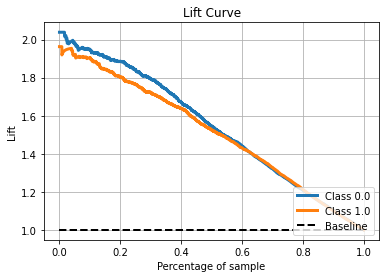

In [45]:
#Predicting the probability and plotting lift
predictions = model4.predict_proba(X)

import scikitplot as skplt
skplt.metrics.plot_lift_curve(y, predictions)

In [46]:
import re, json, requests
import pandas as pd
import math

In [48]:
url = 'https://raw.githubusercontent.com/rohitashwachaks/Social-Media-Influencer-analysis/main/Twitter-Influencers/F1_Database/f1_tweets.json'

In [49]:
resp = requests.get(url)
resp_parsed = re.sub(r'^jsonp\d+\(|\)\s+$', '', resp.text)
data = json.loads(resp_parsed)

In [124]:
data = pd.DataFrame(data)

In [51]:
#creating list to store information
user_provide = []
user_receive = []
attention_type = []

In [52]:
for i in range(len(data)):
    
   #reply
    if data.in_reply_to_screen_name[i] != None:
        user_provide.append(data.user[i].get('screen_name'))
        user_receive.append(data.in_reply_to_screen_name[i])
        attention_type.append('reply')
    
    #retweet
    if type(data.retweeted_status[i]) == dict:
        user_provide.append(data.user[i].get('screen_name'))
        user_receive.append(data.retweeted_status[i].get('user').get('screen_name'))
        attention_type.append('RT')
    
    #mention
    if len(data.entities[i].get('user_mentions'))!=0:
        for j in range(len(data.entities[i].get('user_mentions'))):
            user_provide.append(data.user[i].get('screen_name'))
            user_receive.append(data.entities[i].get('user_mentions')[j].get('screen_name'))
            attention_type.append('mention')

In [53]:
#extract information from tweets 
network_data = pd.DataFrame({'user_provide':user_provide,'user_receive':user_receive,'attention_type':attention_type})

In [54]:
#Data Transformation for network visualization

In [55]:
network_data = pd.DataFrame({'user_provide':user_provide,'user_receive':user_receive,'attention_type':attention_type})
n = pd.DataFrame(network_data[['user_provide','user_receive','attention_type']].groupby(['user_provide','user_receive'])['attention_type'].agg('count'))
n.to_csv('f1_network_links.csv')

In [56]:
participants = {}
for i in set(network_data.user_provide).union(set(network_data.user_receive)):
    participants[i] = 1
participants = pd.Series(participants)
participants.to_csv('f1_network_participants.csv')

In [57]:
n = pd.crosstab(network_data.user_provide, network_data.user_receive)
idx = n.columns.union(n.index)
n = n.reindex(index = idx, columns=idx, fill_value=0)
n.to_csv('f1_network_adjacency.csv')

In [58]:
#Creating Network

In [59]:
import networkx as nx 
import matplotlib.pyplot as plt

In [60]:
G = nx.DiGraph(directed=True)

In [62]:
G.add_nodes_from((network_data.user_provide+network_data.user_receive).unique())
G.add_edges_from(tuple(zip(network_data.user_provide,network_data.user_receive)))

In [ ]:
#Drawing Network
nx.draw(G, with_labels=True)
plt.show() 

In [ ]:
#insert the visualization? 

In [65]:
#Calculating network centralities
degree = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)

In [66]:
centrality = pd.DataFrame(degree,index=['degree']).T

In [96]:
centrality['betweenness'] = pd.DataFrame(betweenness,index=['betweenness']).T.betweenness
centrality['closeness'] = pd.DataFrame(closeness,index=['closeness']).T.closeness
centrality = centrality.reset_index().rename(columns={'index':'name'})

In [98]:
for i in range(len(centrality)):
    centrality.loc[i,'sum'] = centrality.loc[i,'degree']+centrality.loc[i,'betweenness']+centrality.loc[i,'closeness']

In [100]:
#Top 10 most important user in the network based on sum of centralities
centrality.sort_values('sum',ascending = False).head(10)

,name,degree,betweenness,closeness,sum
6988,F1,0.132978,0.000025,0.132510,0.265513
6995,redbullracing,0.074846,0.000000,0.072434,0.147280
6987,F1_Jordan,0.055744,0.000000,0.054802,0.110547
7223,McLarenF1,0.006061,0.000000,0.070166,0.076227
10261,lawrobarretto,0.003582,0.000000,0.068921,0.072502
6997,Max33Verstappen,0.034071,0.000000,0.032887,0.066958
7070,fia,0.014235,0.000000,0.017102,0.031337
9761,MrNickKnowles,0.009000,0.000002,0.011704,0.020706
7029,RobLMyers,0.007622,0.000004,0.007925,0.015552
7031,Independent,0.006245,0.000000,0.009257,0.015502


In [119]:
# Get User data(#followers, #listed, #posts) from raw data file

screenlst = []
followerslst = []
listedlst = []
postlist = []

for i in range(len(data)):
    sname = data.user[i].get('screen_name')
    fcount = data.user[i].get('followers_count')
    lcount = data.user[i].get('listed_count')
    pcount = data.user[i].get('statuses_count')
    screenlst.append(sname)
    followerslst.append(fcount)
    listedlst.append(lcount)
    postlist.append(pcount)

# Store User data in a dataframe
userdata = pd.DataFrame()
userdata['screen_name'] = screenlst
userdata['followers_count'] = followerslst
userdata['listed_count'] = listedlst
userdata['post_count'] = postlist
userdata.head()

In [190]:
# Combine user data + centrality data in to 'score' dataframe
 
scores = userdata.merge(centrality, left_on='screen_name', right_on='name')
scores = scores.drop(columns=['name','sum'])
scores.head()

,screen_name,followers_count,listed_count,post_count,degree,betweenness,closeness
0,jmckinven,2206,69,19720,0.000092,0.000000e+00,0.000000
1,RnbRnb7,817,15,57019,0.001194,9.278047e-08,0.000092
2,RnbRnb7,818,15,57030,0.001194,9.278047e-08,0.000092
3,RnbRnb7,818,15,57031,0.001194,9.278047e-08,0.000092
4,RnbRnb7,818,15,57033,0.001194,9.278047e-08,0.000092


In [191]:
# Normalize data before calculating the overall scores
scores_norm = scores.drop(columns=['screen_name'])
scores_norm = normalize(scores_norm)
scores_norm['screen_name'] = scores['screen_name']

# shift column 'screen_name' to first position
first_column = scores_norm.pop('screen_name')
scores_norm.insert(0, 'screen_name', first_column)

scores_norm.head()

,screen_name,followers_count,listed_count,post_count,degree,betweenness,closeness
0,jmckinven,0.000309,0.002352,0.010375,0.000000,0.000000,0.000000
1,RnbRnb7,0.000115,0.000511,0.030001,0.008293,0.003721,0.000693
2,RnbRnb7,0.000115,0.000511,0.030006,0.008293,0.003721,0.000693
3,RnbRnb7,0.000115,0.000511,0.030007,0.008293,0.003721,0.000693
4,RnbRnb7,0.000115,0.000511,0.030008,0.008293,0.003721,0.000693


In [193]:
# Calcualte overall scores by multiplying user data and the coefficients from Part 1

fcount_coef = coeff_parameter4['Coefficient'].values[0]
lcount_coef = coeff_parameter4['Coefficient'].values[2]
pcount_coef = coeff_parameter4['Coefficient'].values[7]
degree_coef = coeff_parameter4['Coefficient'].values[-3]
between_coef = coeff_parameter4['Coefficient'].values[-2]
closeness_coef = coeff_parameter4['Coefficient'].values[-1]

scores_norm['followers_count'] = scores_norm['followers_count']*fcount_coef
scores_norm['listed_count'] = scores_norm['listed_count']*lcount_coef
scores_norm['post_count'] = scores_norm['post_count']*pcount_coef
scores_norm['degree'] = scores_norm['listed_count']*lcount_coef
scores_norm['post_count'] = scores_norm['post_count']*pcount_coef

scores_norm.head()

,screen_name,followers_count,listed_count,post_count,degree,betweenness,closeness
0,jmckinven,0.000268,0.003566,1.039411e-08,0.004391,0.000000,0.000000
1,RnbRnb7,0.000099,0.000775,3.005484e-08,0.000955,0.003721,0.000693
2,RnbRnb7,0.000099,0.000775,3.006064e-08,0.000955,0.003721,0.000693
3,RnbRnb7,0.000099,0.000775,3.006116e-08,0.000955,0.003721,0.000693
4,RnbRnb7,0.000099,0.000775,3.006222e-08,0.000955,0.003721,0.000693


In [195]:
scores_norm['sum'] = scores_norm['followers_count']+scores_norm['listed_count']+scores_norm['post_count']+scores_norm['degree']+scores_norm['betweenness']+scores_norm['closeness']
scores_norm.head()

,screen_name,followers_count,listed_count,post_count,degree,betweenness,closeness,sum
0,jmckinven,0.000268,0.003566,1.039411e-08,0.004391,0.000000,0.000000,0.008225
1,RnbRnb7,0.000099,0.000775,3.005484e-08,0.000955,0.003721,0.000693,0.006243
2,RnbRnb7,0.000099,0.000775,3.006064e-08,0.000955,0.003721,0.000693,0.006243
3,RnbRnb7,0.000099,0.000775,3.006116e-08,0.000955,0.003721,0.000693,0.006243
4,RnbRnb7,0.000099,0.000775,3.006222e-08,0.000955,0.003721,0.000693,0.006243


In [198]:
# Top 10 Influencers Results
scores_norm.sort_values('sum',ascending = False).drop_duplicates(subset=['screen_name']).head(10)

,screen_name,followers_count,listed_count,post_count,degree,betweenness,closeness,sum
4026,F1,0.865280,1.516269,3.715345e-08,1.867087,1.000000,1.000000,6.248637
1064,wtf1official,0.085437,0.241764,4.380296e-09,0.297700,0.000000,0.013765,0.638667
4109,lawrobarretto,0.004426,0.042017,3.356646e-09,0.051738,0.000000,0.520116,0.618296
4057,ScarbsTech,0.014024,0.190290,3.813598e-08,0.234317,0.013869,0.008366,0.460865
1385,HillF1,0.023745,0.121916,7.223008e-09,0.150123,0.098545,0.054784,0.449113
428,Zoom,0.131426,0.097677,1.759024e-08,0.120277,0.013192,0.012475,0.375046
2384,vincenzolandino,0.004428,0.106308,8.036657e-08,0.130904,0.006089,0.004158,0.251887
702,RobLMyers,0.000930,0.005323,2.660964e-08,0.006555,0.171181,0.059810,0.243798
907,swazzle2000,0.000016,0.000155,1.923957e-09,0.000191,0.231368,0.010141,0.241870
4351,Formula1game,0.030103,0.083827,1.414925e-08,0.103221,0.000677,0.002079,0.219906
